# PALM quick dev

In [1]:
%matplotlib inline
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from peaks.peakfinder import PeakFinder
from peaks.gauss2d import Gauss2D
import skimage.external.tifffile as tif
from matplotlib.colors import LogNorm, PowerNorm

## Setup

First we need to find the files, check the data and check the fitting algorithm

In [2]:
# find files, all on disk thankfully
files_to_process = sorted(glob.glob("Raw Data for Slab0/*.tif"))
files_to_process[::100]

['Raw Data for Slab0\\3DPALM_532nma_Iter_000_000_ch0_CAM1_stack0000_532nm_0000000msec_0003931739msecAbs_000x_000y_000z_0000t.tif',
 'Raw Data for Slab0\\3DPALM_532nma_Iter_100_000_ch0_CAM1_stack0000_532nm_0000000msec_0030206706msecAbs_000x_000y_000z_0100t.tif',
 'Raw Data for Slab0\\3DPALM_532nma_Iter_200_000_ch0_CAM1_stack0000_532nm_0000000msec_0056495843msecAbs_000x_000y_000z_0200t.tif',
 'Raw Data for Slab0\\3DPALM_532nma_Iter_300_000_ch0_CAM1_stack0000_532nm_0000000msec_0082797772msecAbs_000x_000y_000z_0300t.tif',
 'Raw Data for Slab0\\3DPALM_532nma_Iter_400_000_ch0_CAM1_stack0000_532nm_0000000msec_0109219064msecAbs_000x_000y_000z_0400t.tif',
 'Raw Data for Slab0\\3DPALM_532nma_Iter_500_000_ch0_CAM1_stack0000_532nm_0000000msec_0135630201msecAbs_000x_000y_000z_0500t.tif',
 'Raw Data for Slab0\\3DPALM_532nma_Iter_600_000_ch0_CAM1_stack0000_532nm_0000000msec_0162060612msecAbs_000x_000y_000z_0600t.tif',
 'Raw Data for Slab0\\3DPALM_532nma_Iter_700_000_ch0_CAM1_stack0000_532nm_0000000ms

In [3]:
# grab a test stack
test_stack = tif.imread(files_to_process[350])

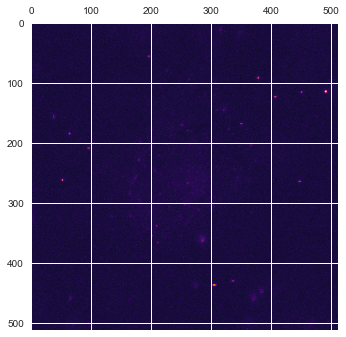

In [4]:
# plot a frame
plt.matshow(test_stack[0], cmap="inferno")

In [5]:
# try a fit
test_pf = PeakFinder(test_stack[0], 1.4, 15)
# test_pf.thresh = 10
# test_pf.find_blobs(min_sigma=1.0, max_sigma=2.0)
test_pf.find_blobs()
test_pf.remove_edge_blobs(10)
%timeit test_pf.fit_blobs(11, quiet=True, fittype="ls")
%timeit test_pf.fit_blobs(11, quiet=True, fittype="mle")

131 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
227 ms ± 3.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


52


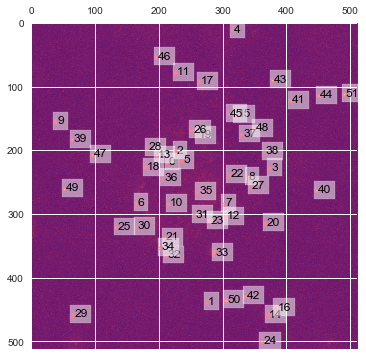

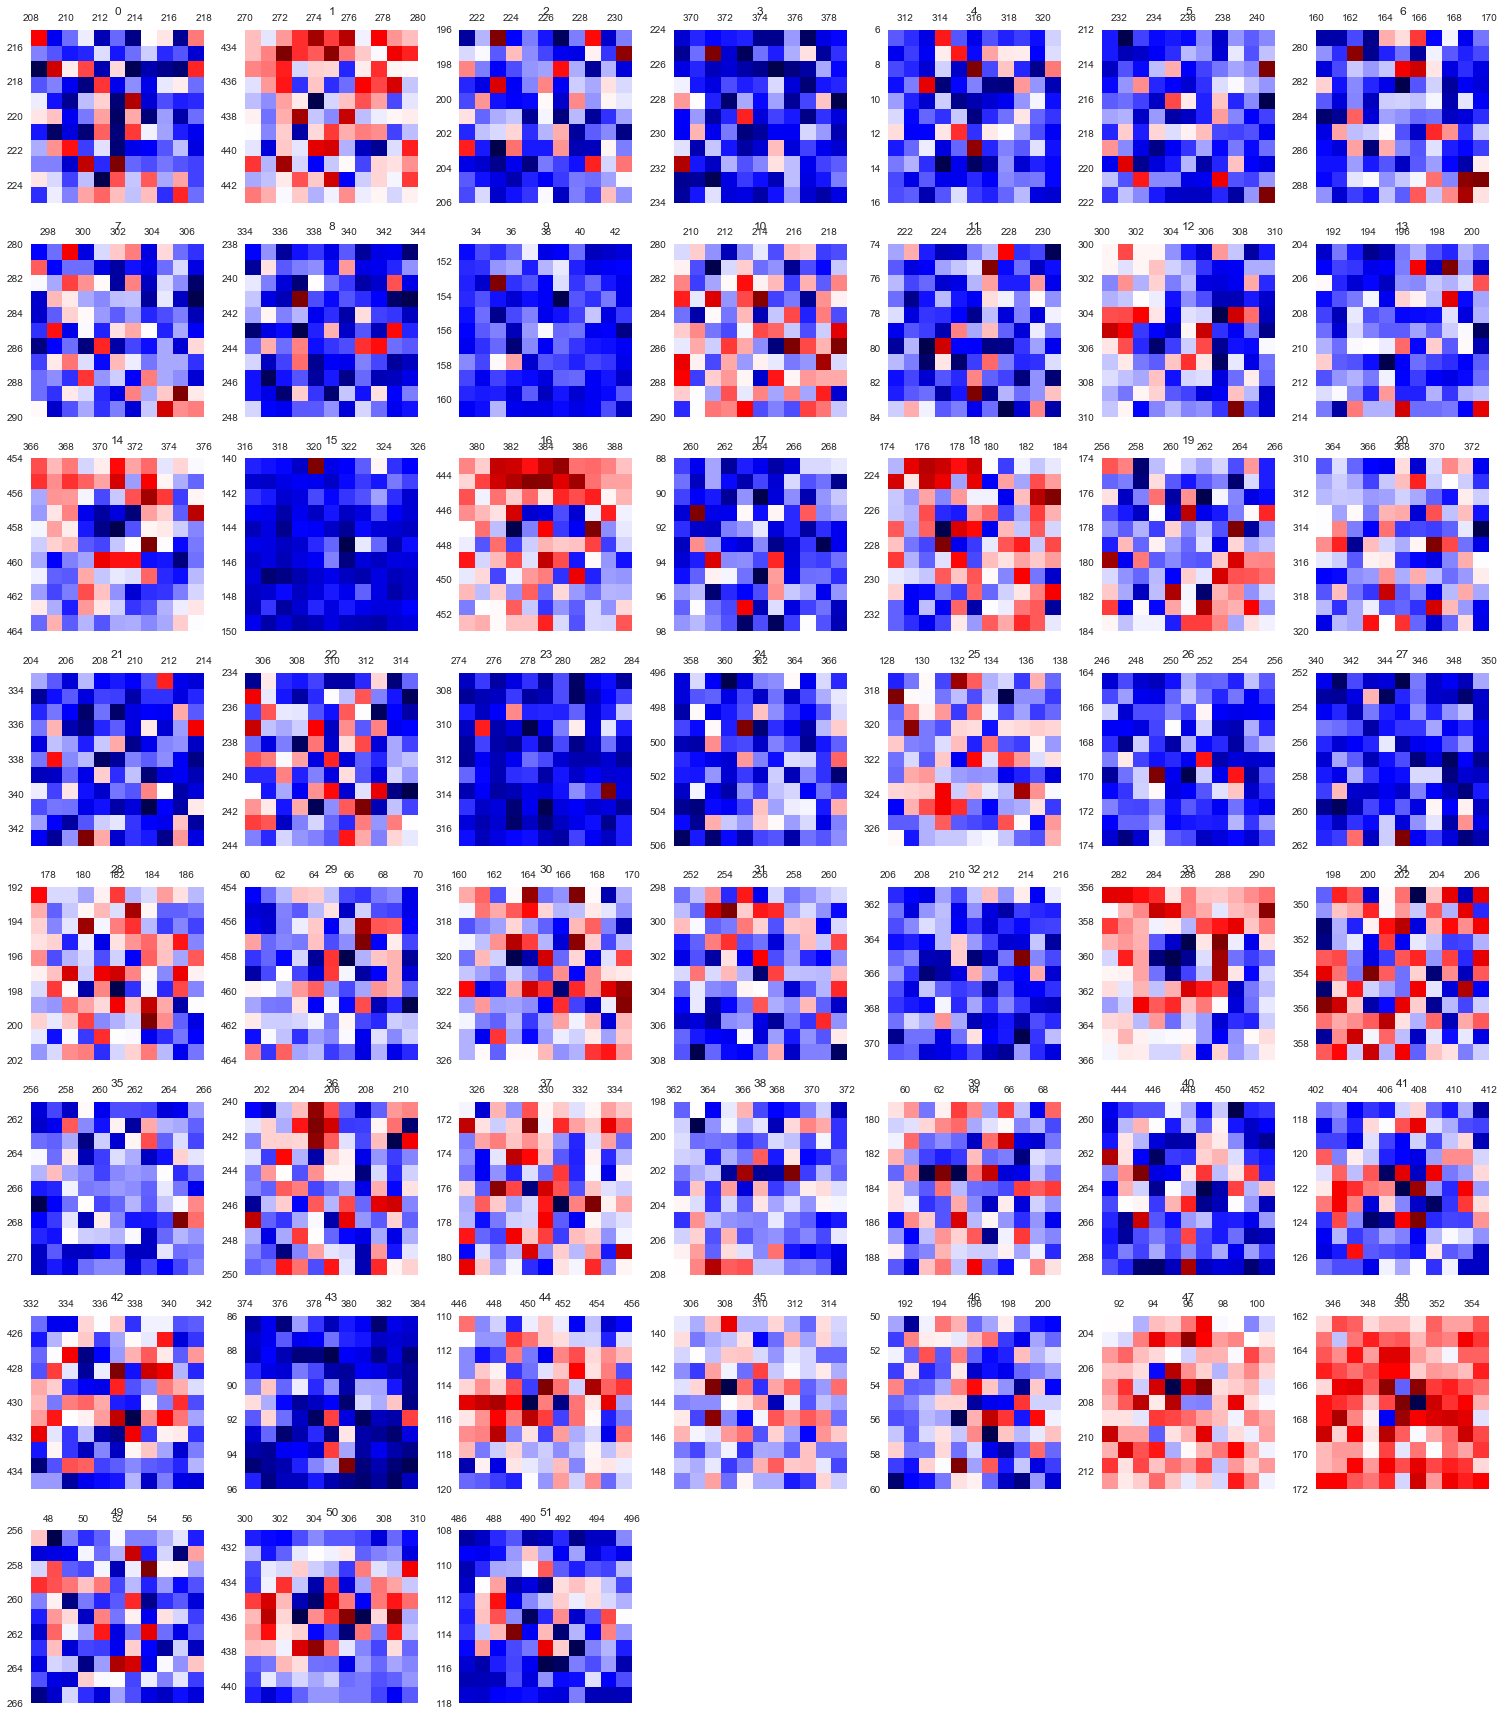

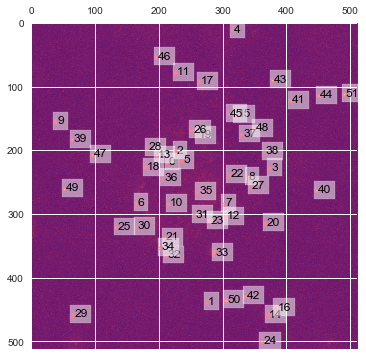

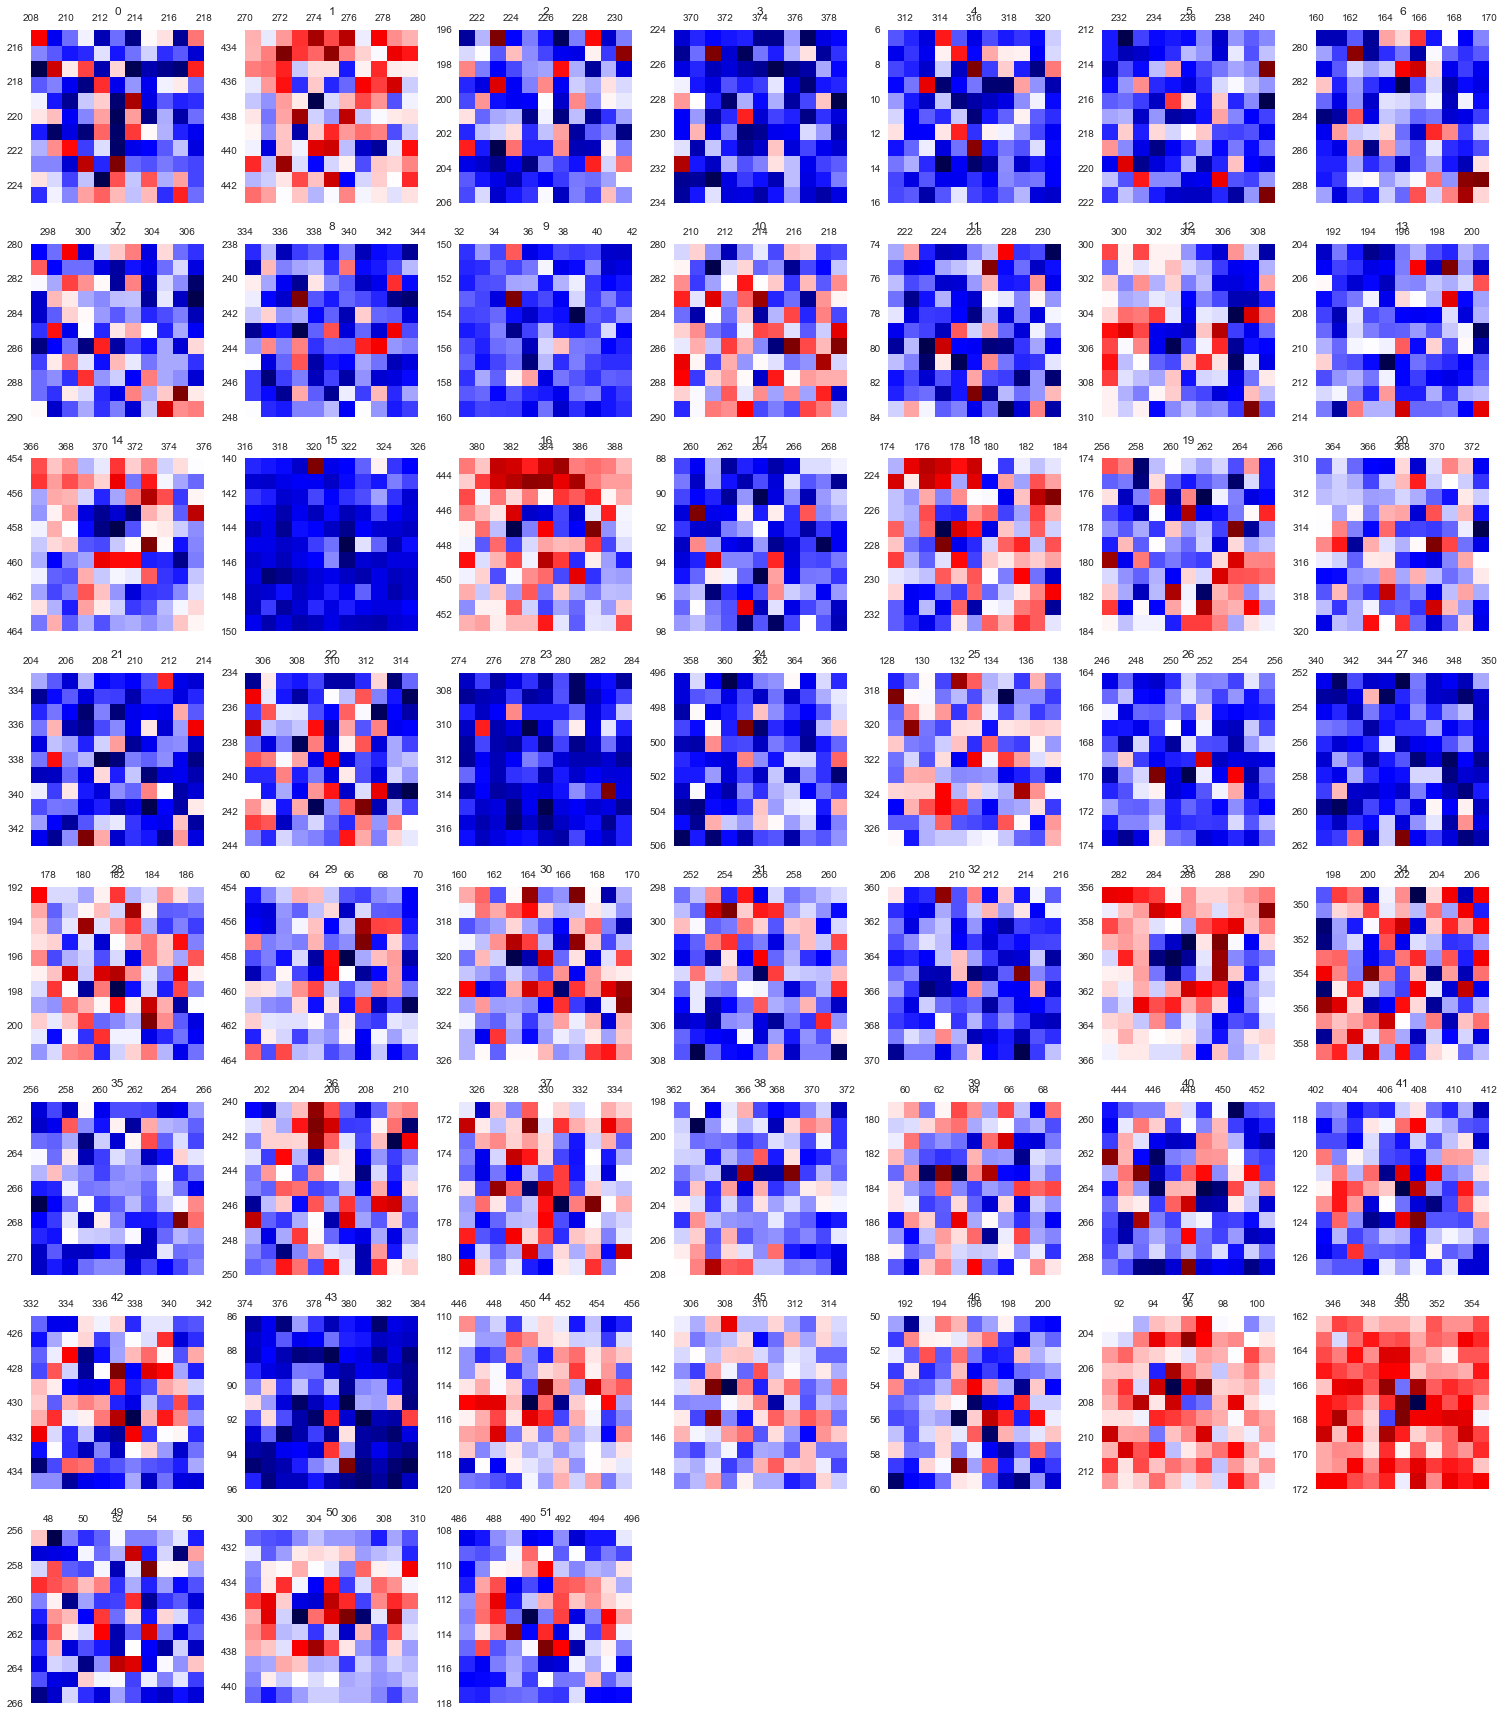

In [17]:
# check the fit
print(len(test_pf.blobs))
test_pf.fit_blobs(9, quiet=True, fittype="ls")
test_pf.plot_blobs(cmap="inferno", norm=PowerNorm(0.5))
test_pf.plot_resids(11, cmap="seismic");
ls_df = test_pf.fits

test_pf.fit_blobs(9, quiet=True, fittype="mle")
test_pf.plot_blobs(cmap="inferno", norm=PowerNorm(0.5))
test_pf.plot_resids(11, cmap="seismic");
mle_df = test_pf.fits

In [18]:
ls_df.head()

,SNR,amp,amp_e,noise,offset,offset_e,sigma_x,sigma_x_e,sigma_y,sigma_y_e,x0,x0_e,y0,y0_e
0,5.747862,60.934501,6.505070,10.601246,129.528988,1.833482,1.290442,0.157675,1.415324,0.172319,213.193696,0.137761,219.996536,0.151085
1,5.392431,76.914576,9.125127,14.263433,120.083708,10.624849,2.584048,0.428923,2.999226,0.526308,274.819279,0.155511,437.952504,0.211591
2,9.165703,87.706440,6.246290,9.568982,132.748362,1.551289,1.289287,0.102249,1.251811,0.099247,225.690758,0.091811,201.429534,0.089145
3,6.547080,76.208737,8.201007,11.640110,134.853682,1.775954,0.956058,0.113509,1.463563,0.170036,374.457280,0.102166,229.000714,0.156738
4,6.740892,101.915907,6.858615,15.119053,133.502743,3.681583,1.441588,0.130114,2.660879,0.268186,315.686504,0.092438,10.769189,0.201048


In [19]:
mle_df.head()

,SNR,amp,amp_e,noise,offset,offset_e,sigma_x,sigma_x_e,sigma_y,sigma_y_e,x0,x0_e,y0,y0_e
0,5.807358,61.597462,0.596059,10.606797,129.594536,0.164627,1.263456,0.013929,1.419014,0.015583,213.178053,0.012221,220.009171,0.013728
1,5.402859,77.105376,0.635972,14.271216,119.399943,0.741836,2.603403,0.029587,3.079524,0.037227,274.806708,0.010443,437.896224,0.014868
2,9.175600,87.826338,0.628292,9.571727,132.738858,0.155929,1.290085,0.010275,1.250452,0.009956,225.678618,0.009228,201.415647,0.008944
3,6.615493,77.035297,0.683757,11.644679,134.890996,0.146060,0.946667,0.009262,1.455467,0.013910,374.448353,0.008334,229.025674,0.012844
4,6.750756,102.149211,0.436326,15.131521,133.462045,0.235744,1.455131,0.008366,2.629472,0.016857,315.699338,0.005932,10.733368,0.012625


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C49D12F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024C4CAF2A58>]], dtype=object)

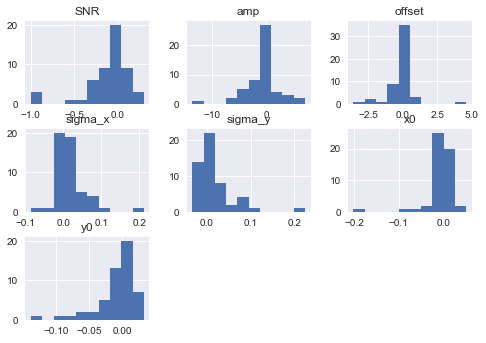

In [23]:
(mle_df - ls_df)[["SNR", "amp", "offset", "x0","y0","sigma_x", "sigma_y"]].hist()

In [24]:
# get multiprocessing support
import dask
import dask.array as da
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import dask.multiprocessing

# Lazy functions for raw data handling
lazy_imread = dask.delayed(tif.imread, pure=True)

def make_lazy_data(paths):
    """Make a lazy data array from a set of paths to data

    Assumes all data is of same shape and type."""
    lazy_data = [lazy_imread(path) for path in paths]
    # read first image for shape
    sample = tif.imread(paths[0])
    data = [da.from_delayed(ld, shape=sample.shape, dtype=sample.dtype) for ld in lazy_data]
    data_array = da.concatenate(data)
    return data_array

In [25]:
all_frames = make_lazy_data(files_to_process)

In [26]:
all_frames

dask.array<concatenate, shape=(190750, 512, 512), dtype=uint16, chunksize=(250, 512, 512)>

In [27]:
def fit_frame(data, frame, fit_width=11, bg=15, fittype="ls"):
    """Fit a single frame of data
    
    Parameters
    ----------
    data : ndarray (2D)
        the data to find and fit peaks
    frame"""
    pf = PeakFinder(data, 1.4, bg)
#     test_pf.thresh = 10
    pf.find_blobs()
    if len(pf.blobs):
        pf.blobs = pf.blobs[:100]
    pf.remove_edge_blobs(10)
    pf_fits = pf.fit_blobs(fit_width, fittype=fittype, quiet=True)
    pf_fits["frame"]=frame
    return pf_fits

def fit_blocks(block, offset, fittype="ls"):
    # turn delayed into data
    # sometimes actual array is passed, not sure why, something do do with 
    try:
        data = block.compute()
    except AttributeError:
        data = block
    j = len(data) * offset
    df = pd.concat([fit_frame(d, i + j, fittype=fittype) for i, d in enumerate(data)])
    return df

fit_blocks_delayed = dask.delayed(pure=True)(fit_blocks)

In [28]:
blocks_delayed = dask.delayed([fit_blocks_delayed(d, i, "mle") for i, d in enumerate(all_frames.to_delayed().squeeze())])

In [29]:
with ProgressBar():
    blocks_delayed_df = pd.concat(blocks_delayed.compute(get=dask.multiprocessing.get))
blocks_delayed_df.to_hdf("Raw_MLE_wbg2.h5", "raw_fits")

[########################################] | 100% Completed |  1hr 13min 41.6s


# With background subtraction

In [30]:
bg = tif.imread("Camera Calibration/dark_wo_1st_512x512_mean.tif")

In [31]:
bg.shape

(512, 512)

In [32]:
all_frames_nb = all_frames - bg
all_frames_nb

dask.array<sub, shape=(190750, 512, 512), dtype=float32, chunksize=(250, 512, 512)>

In [33]:
all_frames_nb_max = da.maximum(all_frames_nb, 0)
all_frames_nb_max

dask.array<maximum, shape=(190750, 512, 512), dtype=float32, chunksize=(250, 512, 512)>

In [34]:
test_frame_nb = all_frames_nb[0].compute()
test_frame_nb_max = all_frames_nb_max[0].compute()

-9.4514084

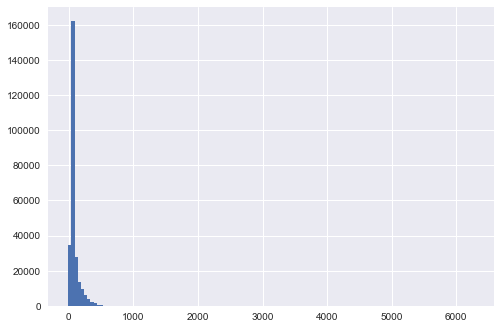

In [35]:
fig, ax = plt.subplots()
ax.hist(test_frame_nb.ravel(), bins=128)
test_frame_nb.min()

0.0

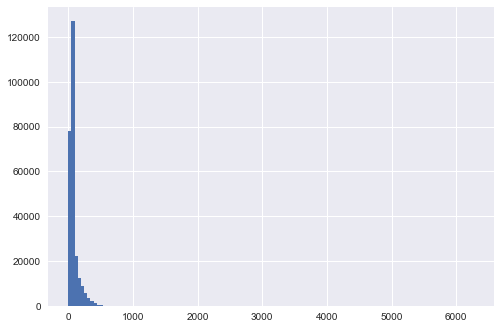

In [36]:
fig, ax = plt.subplots()
ax.hist(test_frame_nb_max.ravel(), bins=128)
test_frame_nb_max.min()

In [37]:
# mle fitting with no background
blocks_delayed = dask.delayed([fit_blocks_delayed(d, i, "mle") for i, d in enumerate(all_frames_nb_max.to_delayed().squeeze())])
with ProgressBar():
    blocks_delayed_df = pd.concat(blocks_delayed.compute(get=dask.multiprocessing.get))
blocks_delayed_df.to_hdf("Raw_MLE_nb2.h5", "raw_fits")

[########################################] | 100% Completed |  1hr 27min 58.4s


In [38]:
# ls fitting with no background
blocks_delayed = dask.delayed([fit_blocks_delayed(d, i, "ls") for i, d in enumerate(all_frames_nb.to_delayed().squeeze())])
with ProgressBar():
    blocks_delayed_df = pd.concat(blocks_delayed.compute(get=dask.multiprocessing.get))
blocks_delayed_df.to_hdf("Raw_LS_nb2.h5", "raw_fits")

[########################################] | 100% Completed | 52min  3.4s


## Taking into account variance for MLE

Following this article http://www.biorxiv.org/content/early/2017/08/08/172643

In [39]:
var = tif.imread("Camera Calibration/dark_wo_1st_512x512_var.tif")

In [40]:
all_frames_nb_var_max = da.maximum(all_frames - bg + var, 0)
all_frames_nb_var_max

dask.array<maximum, shape=(190750, 512, 512), dtype=float32, chunksize=(250, 512, 512)>

In [41]:
# mle fitting with no background
blocks_delayed = dask.delayed([fit_blocks_delayed(d, i, "mle") for i, d in enumerate(all_frames_nb_var_max.to_delayed().squeeze())])
with ProgressBar():
    blocks_delayed_df = pd.concat(blocks_delayed.compute(get=dask.multiprocessing.get))
blocks_delayed_df.to_hdf("Raw_MLE_nb_var2.h5", "raw_fits")

[########################################] | 100% Completed |  2hr 30min 56.7s


In [42]:
blocks_delayed_df.infoo()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13752846 entries, 0 to 91
Data columns (total 15 columns):
SNR          float64
amp          float64
amp_e        float64
noise        float64
offset       float64
offset_e     float64
sigma_x      float64
sigma_x_e    float64
sigma_y      float64
sigma_y_e    float64
x0           float64
x0_e         float64
y0           float64
y0_e         float64
frame        int64
dtypes: float64(14), int64(1)
memory usage: 2.0 GB
